# Introduction to SVM

Used SVM to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.

# Import Necessary Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# About the Dataset

Original Author - UCI Machine Learning Repository (Asuncion and Newman, 2007)

# Load Data from CSV File

In [3]:
cell_df=pd.read_csv(r'C:\Users\Abhishek Padir\Desktop\cell_samples.csv')

In [4]:
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [5]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
cell_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [8]:
cell_df.shape

(699, 11)

In [9]:
cell_df.size

7689

In [10]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [12]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

# Distribution of Classes

In [13]:
benign_df=cell_df[cell_df['Class']==2][0:200]
malignant_df=cell_df[cell_df['Class']==2][0:200]

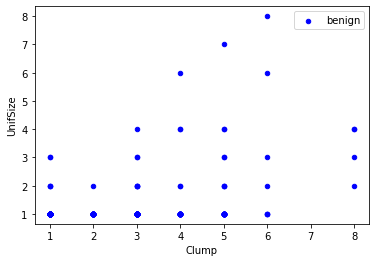

In [25]:
axes=benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='benign')

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

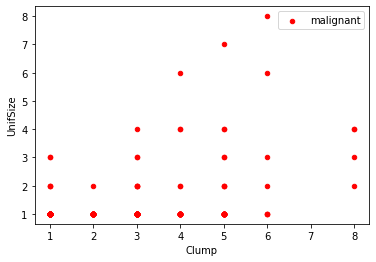

In [27]:
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='malignant')

Text(0.5, 1.0, 'class Probability')

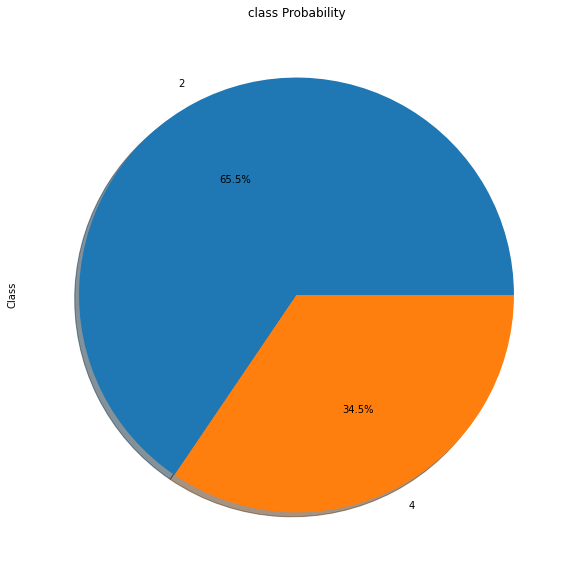

In [28]:
f, ax= plt.subplots(figsize=(10,10))
ax= cell_df['Class'].value_counts().plot.pie(explode=[0,0],autopct = '%1.1f%%', shadow=True)
ax.set_title('class Probability')

# Identifying Unwanted rows

In [31]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [32]:
cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]


In [38]:
cell_df['BareNuc']=cell_df['BareNuc'].astype('int')
cell_df.dtypes

C:\Users\Abhishek Padir\AppData\Local\Temp\ipykernel_21804\600858007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc']=cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# Remove Unwanted Columns

In [39]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [42]:
feature_df=cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

In [43]:
X=np.asarray(feature_df)

In [44]:
y=np.asarray(cell_df['Class'])

In [45]:
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

# Divide the Data as Train/Test Dataset

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y, test_size=0.2,random_state=4)
print(X_train.shape,X_test.shape)

(546, 9) (137, 9)


# Modeling(SVM With Scikit Learn)

In [50]:
from sklearn import svm

In [53]:
classifier=svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train,Y_train)
y_predict=classifier.predict(X_test)

# Evaluation(results)

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

